In [1]:
from __future__ import print_function
import tensorflow as tf
from tqdm import tqdm_notebook   
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set_style(style='darkgrid')
from time import time

In [2]:
def opt_test_MNIST (optimizers, 
                    data,
                    num_steps = 500,
                    batch_size = 128,
                    display_step = 100, switch_step=0):
    # Network Parameters
    n_hidden_1 = 256 # 1st layer number of neurons
    n_hidden_2 = 256 # 2nd layer number of neurons
    num_input = 784 # MNIST data input (img shape: 28*28)
    num_classes = 10 # MNIST total classes (0-9 digits)

    # tf Graph input
    X = tf.placeholder("float", [None, num_input])
    Y = tf.placeholder("float", [None, num_classes])

    # Store layers weight & bias
    weights = {
        'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
        'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
        'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden_1])),
        'b2': tf.Variable(tf.random_normal([n_hidden_2])),
        'out': tf.Variable(tf.random_normal([num_classes]))
    }


    # Create model
    def neural_net(x):
        # Hidden fully connected layer with 256 neurons
        layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
        # Hidden fully connected layer with 256 neurons
        layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
        # Output fully connected layer with a neuron for each class
        out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
        return out_layer

    # Construct model
    logits = neural_net(X)
    prediction = tf.nn.softmax(logits)

    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
        logits=logits, labels=Y))
    #optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    #optimizer = tf.contrib.opt.GGTOptimizer(learning_rate=learning_rate)
    if switch_step != 0:
        optimizer = optimizers[0]
    else:
        optimizer = optimizers
    train_op = optimizer.minimize(loss_op)

    # Evaluate model
    correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    # Initialize the variables (i.e. assign their default value)
    init = tf.global_variables_initializer()
    
    #Return parameters
    Loss = np.empty(num_steps)
    Accur = np.empty(num_steps)
    timing = np.empty(num_steps)
    
    #Start training
    
    with tf.Session() as sess:

        # Run the initializer
        sess.run(init)
        start = time()
        for step in tqdm_notebook(range(num_steps)):
            batch_x, batch_y = data.train.next_batch(batch_size)
            # Run optimization op (backprop)
            
            if switch_step == step and switch_step != 0:
                train_op = optimizers[1].minimize(loss_op)
            
            Loss[step], Accur[step], _ = sess.run([loss_op, accuracy, train_op],
                                                  feed_dict={X: batch_x, Y: batch_y})
            
            timing[step] = time() - start
            
        print("Optimization Finished!")
        return Loss, Accur, timing

In [3]:
tf.logging.set_verbosity(tf.logging.ERROR)
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
    
learning_rate = 0.05
num_steps = 500

x_range = np.arange(0, num_steps)
    
#for opt in optimizers:
opt_GGT = tf.contrib.opt.GGTOptimizer(5 * learning_rate, window=20)
opt_SGD = tf.train.GradientDescentOptimizer(learning_rate / 10)
opt_adam = tf.train.AdamOptimizer(learning_rate)
#Loss_GGT_adam, Accur_GGT_adam = opt_test_MNIST([opt_GGT, opt_adam], mnist, num_steps, batch_size=2000, switch_step=250)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


HBox(children=(IntProgress(value=0, max=500), HTML(value='')))


Optimization Finished!


HBox(children=(IntProgress(value=0, max=500), HTML(value='')))


Optimization Finished!


HBox(children=(IntProgress(value=0, max=500), HTML(value='')))


Optimization Finished!


HBox(children=(IntProgress(value=0, max=500), HTML(value='')))


Optimization Finished!


HBox(children=(IntProgress(value=0, max=500), HTML(value='')))


Optimization Finished!


HBox(children=(IntProgress(value=0, max=500), HTML(value='')))


Optimization Finished!


HBox(children=(IntProgress(value=0, max=500), HTML(value='')))


Optimization Finished!


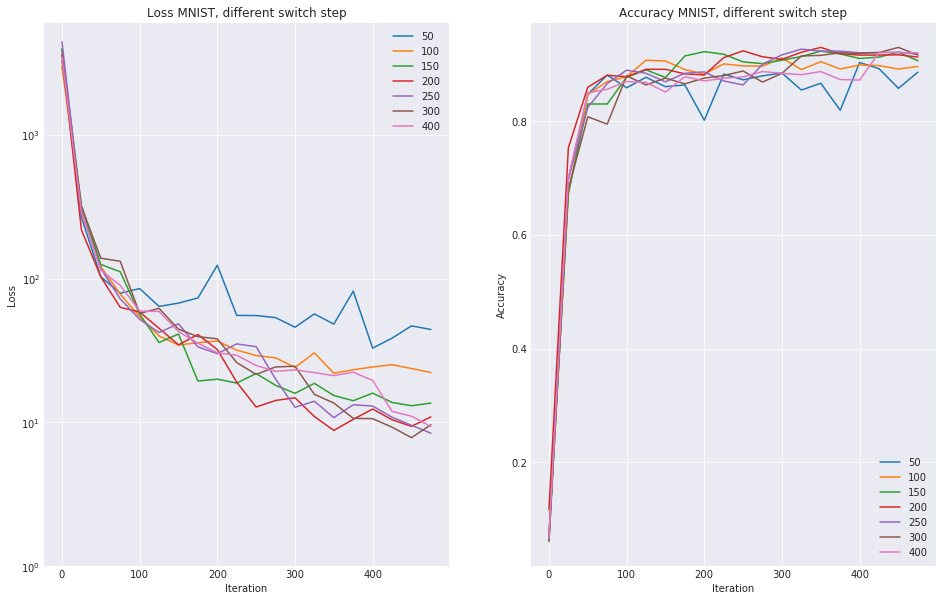

In [4]:
plt.figure(figsize=(16,10))
ar = np.arange(0, num_steps, 25)
for switch_step in [50, 100, 150, 200, 250, 300, 400]:
    Loss_GGT_SGD, Accur_GGT_SGD, _ = opt_test_MNIST([opt_GGT, opt_SGD], mnist, num_steps, batch_size=2000, switch_step=switch_step)
    plt.subplot(1,2,1)
    plt.plot(x_range[ar], Loss_GGT_SGD[ar])
    plt.subplot(1,2,2)
    plt.plot(x_range[ar], Accur_GGT_SGD[ar])
    
legends = ['50', '100', '150', '200', '250', '300', '400']
plt.subplot(1,2,1)
plt.title('Loss MNIST, different switch step')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.legend(legends)
plt.yscale('log')
plt.ylim(1, 6000)

plt.subplot(1,2,2)
plt.title('Accuracy MNIST, different switch step')
plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.legend(legends)

plt.show()

HBox(children=(IntProgress(value=0, max=500), HTML(value='')))


Optimization Finished!


HBox(children=(IntProgress(value=0, max=500), HTML(value='')))


Optimization Finished!


HBox(children=(IntProgress(value=0, max=500), HTML(value='')))


Optimization Finished!


HBox(children=(IntProgress(value=0, max=500), HTML(value='')))


Optimization Finished!


HBox(children=(IntProgress(value=0, max=500), HTML(value='')))


Optimization Finished!


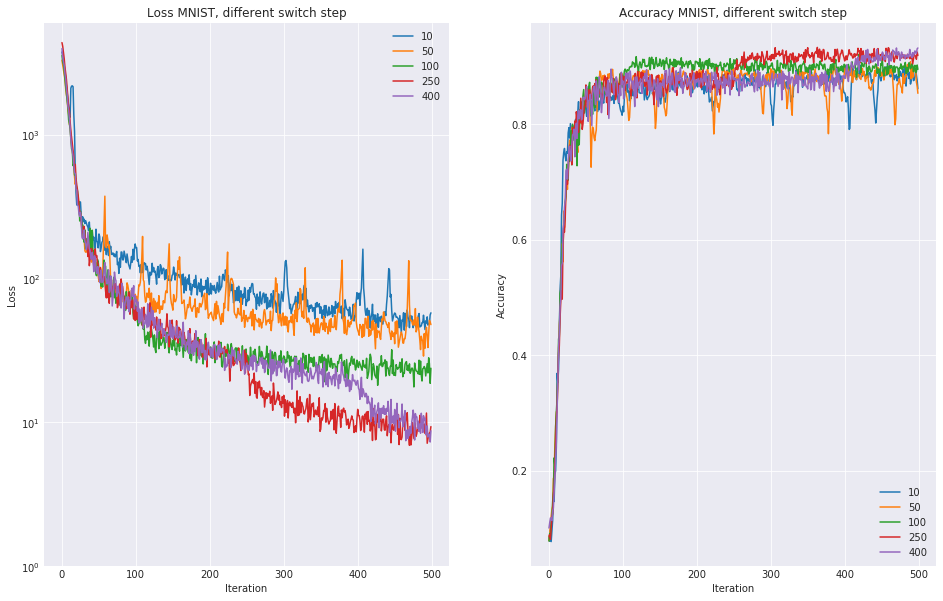

In [5]:
plt.figure(figsize=(16,10))

for switch_step in [10, 50, 100, 250, 400]:
    Loss_GGT_SGD, Accur_GGT_SGD, _ = opt_test_MNIST([opt_GGT, opt_SGD], mnist, num_steps, batch_size=2000, switch_step=switch_step)
    plt.subplot(1,2,1)
    plt.plot(x_range, Loss_GGT_SGD)
    plt.subplot(1,2,2)
    plt.plot(x_range, Accur_GGT_SGD)
    
plt.subplot(1,2,1)
plt.title('Loss MNIST, different switch step')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.legend(['10', '50', '100', '250', '400'])
plt.yscale('log')
plt.ylim(1, 6000)

plt.subplot(1,2,2)
plt.title('Accuracy MNIST, different switch step')
plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.legend(['10', '50', '100', '250', '400'])

plt.show()

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


HBox(children=(IntProgress(value=0, max=500), HTML(value='')))


Optimization Finished!


HBox(children=(IntProgress(value=0, max=500), HTML(value='')))


Optimization Finished!


HBox(children=(IntProgress(value=0, max=500), HTML(value='')))


Optimization Finished!


HBox(children=(IntProgress(value=0, max=500), HTML(value='')))


Optimization Finished!


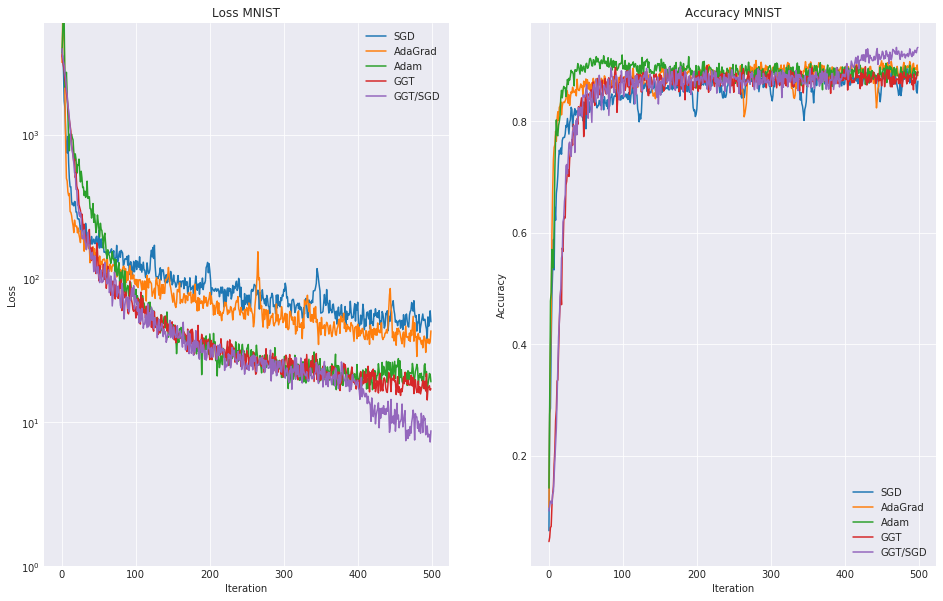

In [6]:
tf.logging.set_verbosity(tf.logging.ERROR)
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
    
learning_rate = 0.05
num_steps = 500
optimizers = [
              tf.train.GradientDescentOptimizer(learning_rate / 10),
              tf.train.AdagradOptimizer(learning_rate),
              tf.train.AdamOptimizer(learning_rate),
              tf.contrib.opt.GGTOptimizer(5 * learning_rate, window=20)
             ]

x_range = np.arange(0, num_steps)
plt.figure(figsize=(16,10))
    
for opt in optimizers:
    Loss, Accur, _ = opt_test_MNIST(opt, mnist, num_steps, batch_size=2000)
    plt.subplot(1,2,1)
    plt.plot(x_range, Loss)
    plt.subplot(1,2,2)
    plt.plot(x_range, Accur)
    
Loss_GGT_SGD, Accur_GGT_SGD, _ = opt_test_MNIST([opt_GGT, opt_SGD], mnist, num_steps, batch_size=2000, switch_step=250)
plt.subplot(1,2,1)
plt.plot(x_range, Loss_GGT_SGD)
plt.subplot(1,2,2)
plt.plot(x_range, Accur_GGT_SGD)
    
plt.subplot(1,2,1)
plt.title('Loss MNIST')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.legend(['SGD', 'AdaGrad', 'Adam',  'GGT', 'GGT/SGD'])
plt.yscale('log')
plt.ylim(1, 6000)

plt.subplot(1,2,2)
plt.title('Accuracy MNIST')
plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.legend(['SGD', 'AdaGrad', 'Adam',  'GGT', 'GGT/SGD'])

plt.show()

## Syntetic test ill-conditional Gaussion destribution

In [7]:
gen = np.random.rand(10)
np.random.shuffle(gen)
gen[-1] = np.max(gen[:-1]) / 100
G = np.diag(gen)**2
np.linalg.cond(G)

10000.000000000002

In [8]:
X = np.random.multivariate_normal(np.zeros(10), G, size=1500)
plane = np.random.randn(10)
y = np.empty((1500, 1))
y[:, 0] = (np.sign(X.dot(plane)) + 1) / 2

X_train, X_test = X[:1000], X[1000:]
y_train, y_test = y[:1000], y[1000:]

In [9]:
X_train.shape, y_train.shape, y_train.mean()

((1000, 10), (1000, 1), 0.495)

In [10]:
# hyperparameters
learning_rate = 0.1
display_step = 1

def Syntetic_test_1 (optimizers, num_epochs, switch_step=0):
    # tf Graph input
    X = tf.placeholder("float", [None, 10])
    y = tf.placeholder("float", [None, 1])

    W = tf.Variable(tf.zeros([10, 1]))
    # b is our bias. This will also update during training time
    b = tf.Variable(tf.zeros([1]))

    #function
    y_ = tf.matmul(X, W) + b
    #logistic regression loss
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=y_))
    if switch_step != 0:
        optimizer = optimizers[0].minimize(loss)
    else:
        optimizer = optimizers.minimize(loss)

    Loss = np.empty(num_epochs)
    timing = np.empty(num_epochs)
    
    with tf.Session() as sess:
        # initialize all variables
        sess.run(tf.global_variables_initializer())
        start = time()
        for epoch in tqdm_notebook(range(num_epochs)):
            cost_in_each_epoch = 0
            # let's start training
            if switch_step == epoch and switch_step != 0:
                optimizer = optimizers[1].minimize(loss)
            _, Loss[epoch] = sess.run([optimizer, loss], feed_dict={X: X_train, y: y_train})
            timing[epoch] = time() - start

    return Loss, timing

In [12]:
X = np.random.multivariate_normal(np.zeros(10), G, size=1500)
c = np.empty((1500, 1))
c[:, 0] = np.random.uniform(0, 1, 1500)

plane = np.random.randn(10)

X_train, X_test = X[:1000], X[1000:]
c_train, c_test = c[:1000], c[1000:]

In [13]:
import tensorflow as tf

# hyperparameters
learning_rate = 0.1
num_epochs = 500
display_step = 1

def Syntetic_test_2 (optimizers, num_epochs, switch_step=0):
    # tf Graph input
    X = tf.placeholder("float", [None, 10])
    c = tf.placeholder("float", [None, 1])

    W = tf.Variable(tf.zeros([10, 1]))
    # b is our bias. This will also update during training time

    #function
    y_ = -tf.log1p(tf.matmul(X, W) + c)
    #logistic regression loss
    loss = tf.reduce_mean(y_)
    if switch_step != 0:
        optimizer = optimizers[0].minimize(loss)
    else:
        optimizer = optimizers.minimize(loss)

    Loss = np.empty(num_epochs+1)

    with tf.Session() as sess:
        # initialize all variables
        sess.run(tf.global_variables_initializer())
        for epoch in tqdm_notebook(range(num_epochs)):
            cost_in_each_epoch = 0
            # let's start training
            if switch_step == epoch and switch_step != 0:
                optimizer = optimizers[1].minimize(loss)
            _, Loss[epoch] = sess.run([optimizer, loss], feed_dict={X: X_train, c: c_train})

    return (Loss)

In [16]:
def opt_test_MNIST (optimizers, 
                    data,
                    time_left,
                    batch_size = 128,
                    display_step = 100, switch_step=0):
    # Network Parameters
    n_hidden_1 = 256 # 1st layer number of neurons
    n_hidden_2 = 256 # 2nd layer number of neurons
    num_input = 784 # MNIST data input (img shape: 28*28)
    num_classes = 10 # MNIST total classes (0-9 digits)

    # tf Graph input
    X = tf.placeholder("float", [None, num_input])
    Y = tf.placeholder("float", [None, num_classes])

    # Store layers weight & bias
    weights = {
        'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
        'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
        'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden_1])),
        'b2': tf.Variable(tf.random_normal([n_hidden_2])),
        'out': tf.Variable(tf.random_normal([num_classes]))
    }


    # Create model
    def neural_net(x):
        # Hidden fully connected layer with 256 neurons
        layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
        # Hidden fully connected layer with 256 neurons
        layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
        # Output fully connected layer with a neuron for each class
        out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
        return out_layer

    # Construct model
    logits = neural_net(X)
    prediction = tf.nn.softmax(logits)

    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
        logits=logits, labels=Y))
    #optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    #optimizer = tf.contrib.opt.GGTOptimizer(learning_rate=learning_rate)
    if switch_step != 0:
        optimizer = optimizers[0]
    else:
        optimizer = optimizers
    train_op = optimizer.minimize(loss_op)

    # Evaluate model
    correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    # Initialize the variables (i.e. assign their default value)
    init = tf.global_variables_initializer()
    
    #Return parameters
    Loss = []
    Accur = []
    timing = []
    
    #Start training
    
    with tf.Session() as sess:

        # Run the initializer
        sess.run(init)
        start = time()
        step = 0
        while time() - start < time_left:
            step += 1
            batch_x, batch_y = data.train.next_batch(batch_size)
            # Run optimization op (backprop)
            
            if switch_step == step and switch_step != 0:
                train_op = optimizers[1].minimize(loss_op)
            
            L, A, _ = sess.run([loss_op, accuracy, train_op],
                                                  feed_dict={X: batch_x, Y: batch_y})
            Loss.append(L)
            Accur.append(A)
            timing.append(time() - start)
            
        print("Optimization Finished!")
        return Loss, Accur, timing

In [18]:
gen = np.random.rand(10)
np.random.shuffle(gen)
gen[-1] = np.max(gen[:-1]) / 100
G = np.diag(gen)**2
np.linalg.cond(G)

X = np.random.multivariate_normal(np.zeros(10), G, size=1500)
plane = np.random.randn(10)
y = np.empty((1500, 1))
y[:, 0] = (np.sign(X.dot(plane)) + 1) / 2

X_train, X_test = X[:1000], X[1000:]
y_train, y_test = y[:1000], y[1000:]

In [27]:
# hyperparameters
learning_rate = 0.1
display_step = 1

def Syntetic_test_1 (optimizers, time_left, switch_step=0):
    # tf Graph input
    X = tf.placeholder("float", [None, 10])
    y = tf.placeholder("float", [None, 1])

    W = tf.Variable(tf.zeros([10, 1]))
    # b is our bias. This will also update during training time
    b = tf.Variable(tf.zeros([1]))

    #function
    y_ = tf.matmul(X, W) + b
    #logistic regression loss
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=y_))
    if switch_step != 0:
        optimizer = optimizers[0].minimize(loss)
    else:
        optimizer = optimizers.minimize(loss)

    Loss = []
    timing = []
    
    with tf.Session() as sess:
        # initialize all variables
        sess.run(tf.global_variables_initializer())
        start = time()
        epoch = 0
        
        while time() - start < time_left:
            epoch += 1
            cost_in_each_epoch = 0
            # let's start training
            if switch_step == epoch and switch_step != 0:
                optimizer = optimizers[1].minimize(loss)
            _, L= sess.run([optimizer, loss], feed_dict={X: X_train, y: y_train})
            Loss.append(L)
            timing.append(time() - start)
            
    return np.array(Loss), np.array(timing)

In [21]:
gen = np.random.rand(10)
np.random.shuffle(gen)
gen[-1] = np.max(gen[:-1]) / 100
G = np.diag(gen)**2
np.linalg.cond(G)

9999.9999999999982

In [22]:
X = np.random.multivariate_normal(np.zeros(10), G, size=1500)
plane = np.random.randn(10)
y = np.empty((1500, 1))
y[:, 0] = (np.sign(X.dot(plane)) + 1) / 2

X_train, X_test = X[:1000], X[1000:]
y_train, y_test = y[:1000], y[1000:]

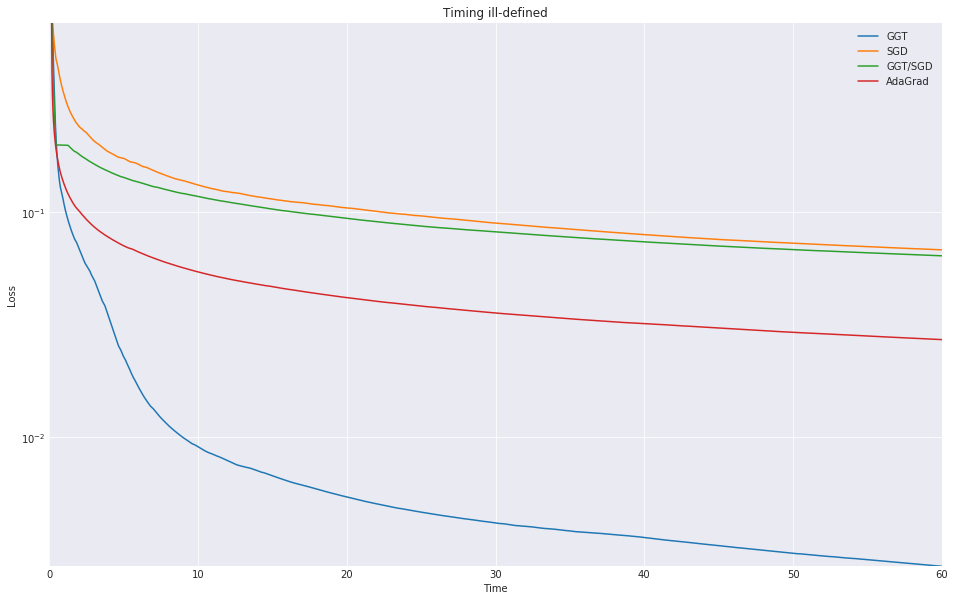

In [29]:
num_epochs = 500
max_y = 0.0

opt_GGT = tf.contrib.opt.GGTOptimizer(learning_rate / 5, window=20)
opt_SGD = tf.train.GradientDescentOptimizer(learning_rate / 10)
opt_ADARGAD = tf.train.AdagradOptimizer(learning_rate)

plt.figure(figsize=(16,10))

Loss, timing = Syntetic_test_1(opt_GGT, 60)
plt.plot(timing, Loss)
max_y = np.max([np.max(Loss), max_y])
#print (timing)
Loss, timing = Syntetic_test_1(opt_SGD, 60)
plt.plot(timing, Loss)
max_y = np.max([np.max(Loss), max_y])
#print (timing)
Loss, timing = Syntetic_test_1([opt_GGT, opt_SGD], 60, switch_step=250)
plt.plot(timing, Loss)
max_y = np.max([np.max(Loss), max_y])
#print (timing)
Loss, timing = Syntetic_test_1(opt_ADARGAD, 60)
plt.plot(timing, Loss)
max_y = np.max([np.max(Loss), max_y])

plt.title('Timing ill-defined')
plt.ylabel('Loss')
plt.xlabel('Time')
plt.legend(['GGT', 'SGD', 'GGT/SGD', 'AdaGrad'])
plt.yscale('log')
plt.xlim(0, 60)
plt.ylim(0, max_y)

plt.show()

In [2]:
gen = np.random.rand(10)
np.random.shuffle(gen)
gen[-1] = np.max(gen[:-1]) / 100
G = np.diag(gen)**2
np.linalg.cond(G)

X = np.random.multivariate_normal(np.zeros(10), G, size=1500)
c = np.empty((1500, 1))
c[:, 0] = np.random.uniform(0, 1, 1500)

plane = np.random.randn(10)

X_train, X_test = X[:1000], X[1000:]
c_train, c_test = c[:1000], c[1000:]

In [3]:
import tensorflow as tf
from time import time

# hyperparameters
num_epochs = 200

def Syntetic_test_2 (optimizers, time_left, batch_size = 1000, switch_step=0):
    # tf Graph input
    X = tf.placeholder("float", [None, 10])
    c = tf.placeholder("float", [None, 1])

    W = tf.Variable(tf.zeros([10, 1]))

    #function
    y_ = tf.matmul(X, W) + c
    compr = tf.less(tf.constant(0., "float", shape=[batch_size]), y_[:, 0])
    
    loss = tf.reduce_mean(tf.where(compr, -tf.log(y_), tf.constant(1000, "float", [batch_size, 1])))
    #logistic regression loss
    if switch_step != 0:
        optimizer = optimizers[0].minimize(loss)
    else:
        optimizer = optimizers.minimize(loss)

    Loss = []
    timing = []

    with tf.Session() as sess:
        # initialize all variables
        sess.run(tf.global_variables_initializer())
        start = time()
        epoch = 0 
        while time() - start < time_left:
            
            epoch += 1
            cost_in_each_epoch = 0
            if switch_step == epoch and switch_step != 0:
                optimizer = optimizers[1].minimize(loss)
            # let's start training
            _, L = sess.run([optimizer, loss], feed_dict={X: X_train, c: c_train})
            
            Loss.append(L)
            timing.append(time() - start)

    #     # Test model
    #     correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(y, 1))
    #     # Calculate accuracy for 3000 examples
    #     accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    #     print("Accuracy:", accuracy.eval({X: X_test, y: y_test}))
    return Loss, timing

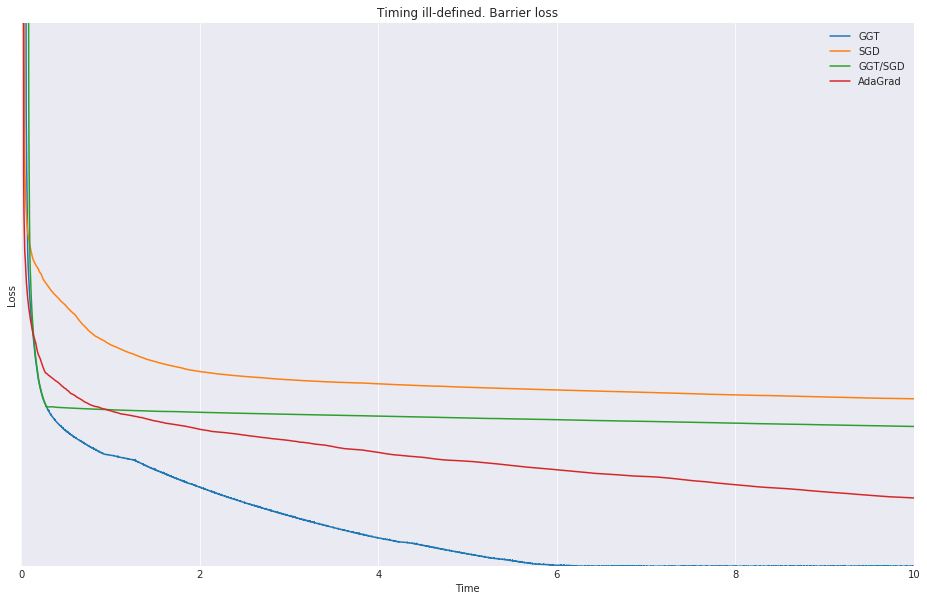

In [5]:
learning_rate = 0.001
max_y = 0

opt_GGT = tf.contrib.opt.GGTOptimizer(learning_rate / 5, window=20)
opt_SGD = tf.train.GradientDescentOptimizer(learning_rate / 10)
opt_ADARGAD = tf.train.AdagradOptimizer(learning_rate)

plt.figure(figsize=(16,10))

Loss, timing = Syntetic_test_2(opt_GGT, 10)
plt.plot(timing, Loss)
max_y = np.max([np.max(Loss), max_y])
#print (timing)
Loss, timing = Syntetic_test_2(opt_SGD, 10)
plt.plot(timing, Loss)
max_y = np.max([np.max(Loss), max_y])
#print (timing)
Loss, timing = Syntetic_test_2([opt_GGT, opt_SGD], 10, switch_step=250)
plt.plot(timing, Loss)
max_y = np.max([np.max(Loss), max_y])
#print (timing)
Loss, timing = Syntetic_test_2(opt_ADARGAD, 10)
plt.plot(timing, Loss)
max_y = np.max([np.max(Loss), max_y])

plt.title('Timing ill-defined. Barrier loss')
plt.ylabel('Loss')
plt.xlabel('Time')
plt.yscale('log')
plt.legend(['GGT', 'SGD', 'GGT/SGD', 'AdaGrad'])
plt.xlim(0, 10)
plt.ylim(0, max_y)

plt.show()

In [30]:
def opt_test_MNIST (optimizers, 
                    data,
                    time_left,
                    batch_size = 128,
                    display_step = 100, switch_step=0):
    # Network Parameters
    n_hidden_1 = 256 # 1st layer number of neurons
    n_hidden_2 = 256 # 2nd layer number of neurons
    num_input = 784 # MNIST data input (img shape: 28*28)
    num_classes = 10 # MNIST total classes (0-9 digits)

    # tf Graph input
    X = tf.placeholder("float", [None, num_input])
    Y = tf.placeholder("float", [None, num_classes])

    # Store layers weight & bias
    weights = {
        'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
        'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
        'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden_1])),
        'b2': tf.Variable(tf.random_normal([n_hidden_2])),
        'out': tf.Variable(tf.random_normal([num_classes]))
    }


    # Create model
    def neural_net(x):
        # Hidden fully connected layer with 256 neurons
        layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
        # Hidden fully connected layer with 256 neurons
        layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
        # Output fully connected layer with a neuron for each class
        out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
        return out_layer

    # Construct model
    logits = neural_net(X)
    prediction = tf.nn.softmax(logits)

    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
        logits=logits, labels=Y))
    #optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    #optimizer = tf.contrib.opt.GGTOptimizer(learning_rate=learning_rate)
    if switch_step != 0:
        optimizer = optimizers[0]
    else:
        optimizer = optimizers
    train_op = optimizer.minimize(loss_op)

    # Evaluate model
    correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    # Initialize the variables (i.e. assign their default value)
    init = tf.global_variables_initializer()
    
    #Return parameters
    Loss = []
    Accur = []
    timing = []
    
    #Start training
    
    with tf.Session() as sess:

        # Run the initializer
        sess.run(init)
        start = time()
        step = 0
        while time() - start < time_left:
            step += 1
            batch_x, batch_y = data.train.next_batch(batch_size)
            # Run optimization op (backprop)
            
            if switch_step == step and switch_step != 0:
                train_op = optimizers[1].minimize(loss_op)
            
            L, A, _ = sess.run([loss_op, accuracy, train_op],
                                                  feed_dict={X: batch_x, Y: batch_y})
            
            Loss.append(L)
            Accur.append(A)
            
            timing.append(time() - start)
            
        print("Optimization Finished!")
        return Loss, Accur, timing

Optimization Finished!
Optimization Finished!
Optimization Finished!
Optimization Finished!


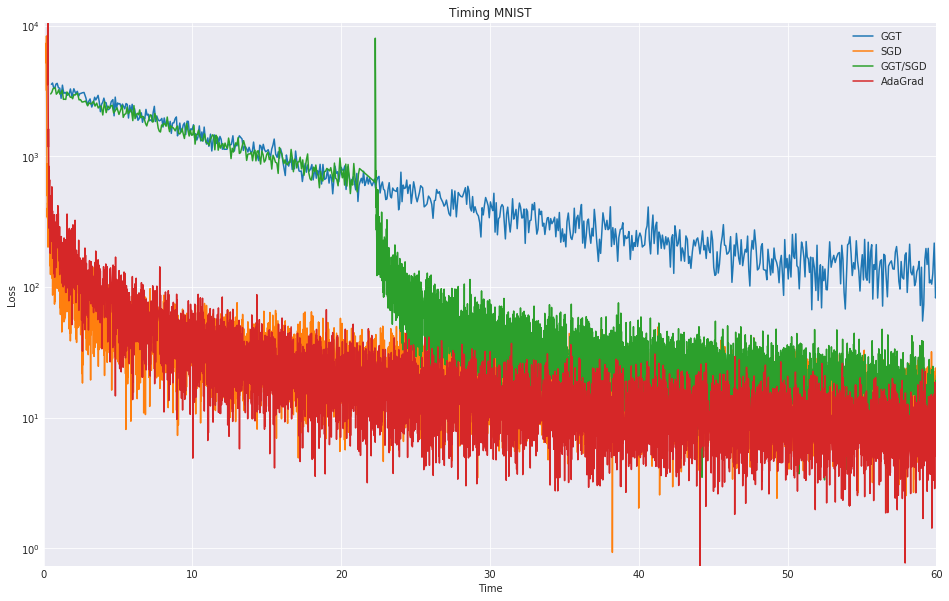

In [31]:
num_epochs = 500
max_y = 0.0

opt_GGT = tf.contrib.opt.GGTOptimizer(learning_rate / 5, window=20)
opt_SGD = tf.train.GradientDescentOptimizer(learning_rate / 10)
opt_ADARGAD = tf.train.AdagradOptimizer(learning_rate)

plt.figure(figsize=(16,10))

max_time = 60

Loss, _, timing = opt_test_MNIST(opt_GGT, mnist, max_time)
plt.plot(timing, Loss)
max_y = np.max([np.max(Loss), max_y])
#print (timing)
Loss, _, timing = opt_test_MNIST(opt_SGD, mnist, max_time)
plt.plot(timing, Loss)
max_y = np.max([np.max(Loss), max_y])
#print (timing)
Loss, _, timing = opt_test_MNIST([opt_GGT, opt_SGD], mnist, max_time, switch_step=250)
plt.plot(timing, Loss)
max_y = np.max([np.max(Loss), max_y])
#print (timing)
Loss, _, timing = opt_test_MNIST(opt_ADARGAD, mnist, max_time)
plt.plot(timing, Loss)
max_y = np.max([np.max(Loss), max_y])

plt.title('Timing MNIST')
plt.ylabel('Loss')
plt.xlabel('Time')
plt.legend(['GGT', 'SGD', 'GGT/SGD', 'AdaGrad'])
plt.yscale('log')
plt.xlim(0, max_time)
plt.ylim(0, max_y)

plt.show()

Didn't use the below part

In [143]:
def opt_test_MNIST (optimizers, 
                    data,
                    num_steps,
                    batch_size = 128,
                    display_step = 100, switch_step=0):
    # Network Parameters
    n_hidden_1 = 256 # 1st layer number of neurons
    n_hidden_2 = 256 # 2nd layer number of neurons
    num_input = 784 # MNIST data input (img shape: 28*28)
    num_classes = 10 # MNIST total classes (0-9 digits)

    # tf Graph input
    X = tf.placeholder("float", [None, num_input])
    Y = tf.placeholder("float", [None, num_classes])

    # Store layers weight & bias
    weights = {
        'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
        'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
        'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden_1])),
        'b2': tf.Variable(tf.random_normal([n_hidden_2])),
        'out': tf.Variable(tf.random_normal([num_classes]))
    }


    # Create model
    def neural_net(x):
        # Hidden fully connected layer with 256 neurons
        layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
        # Hidden fully connected layer with 256 neurons
        layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
        # Output fully connected layer with a neuron for each class
        out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
        return out_layer

    # Construct model
    logits = neural_net(X)
    prediction = tf.nn.softmax(logits)

    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
        logits=logits, labels=Y))
    #optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    #optimizer = tf.contrib.opt.GGTOptimizer(learning_rate=learning_rate)
    if switch_step != 0:
        optimizer = optimizers[0]
    else:
        optimizer = optimizers
    train_op = optimizer.minimize(loss_op)

    # Evaluate model
    correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    # Initialize the variables (i.e. assign their default value)
    init = tf.global_variables_initializer()
    
    #Return parameters
    Loss = []
    Accur = []
    timing = []
    
    #Start training
    
    with tf.Session() as sess:

        # Run the initializer
        sess.run(init)
        step = 0
        for step in tqdm_notebook(range(num_steps)):
            step += 1
            batch_x, batch_y = data.train.next_batch(batch_size)
            # Run optimization op (backprop)
            
            if switch_step == step and switch_step != 0:
                train_op = optimizers[1].minimize(loss_op)
                grads_and_vars = optimizers[1].compute_gradients(loss_op)
            
            L, A, _ = sess.run([loss_op, accuracy, train_op],
                                                  feed_dict={X: batch_x, Y: batch_y})
            if step < switch_step:
                if switch_step != 0:
                    grads_and_vars = optimizer.compute_gradients(loss_op)
                else:
                    grads_and_vars = optimizers.compute_gradients(loss_op)
            grad_norms = tf.add_n([tf.nn.l2_loss(g) for g, v in grads_and_vars if g is not None])
            gn = sess.run([grad_norms], feed_dict={X: batch_x, Y: batch_y})
            print (gn)
            Loss.append(L)
            Accur.append(A)
            
        print("Optimization Finished!")
        return Loss, Accur, timing